# Surya G 20BCE0079

In [ ]:
mkdir bird

In [ ]:
mv /content/lists /content/bird

In [ ]:
mv /content/images /content/bird

###Package Imports Block

In [ ]:
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import floor
import random
print(os.listdir("../content"))

Using TensorFlow backend.


['.config', 'drive', 'bird', '._lists', '._images', 'sample_data']


In [ ]:
data_path='/content/bird/images'

In [ ]:
def BirdView(genera):
  print("Samples images for Bird " + genera)
  root_path='/content/bird/images/'
  img_path=root_path+genera+'/**'
  images =glob(img_path)
  plt.figure(figsize=(16,16))
  img=random.sample(images,3)
  plt.subplot(131)
  plt.imshow(cv2.imread(img[0]))
  plt.subplot(132)
  plt.imshow(cv2.imread(img[1]))
  plt.subplot(133)
  plt.imshow(cv2.imread(img[2]))
  return

Samples images for Bird 043.Yellow_bellied_Flycatcher


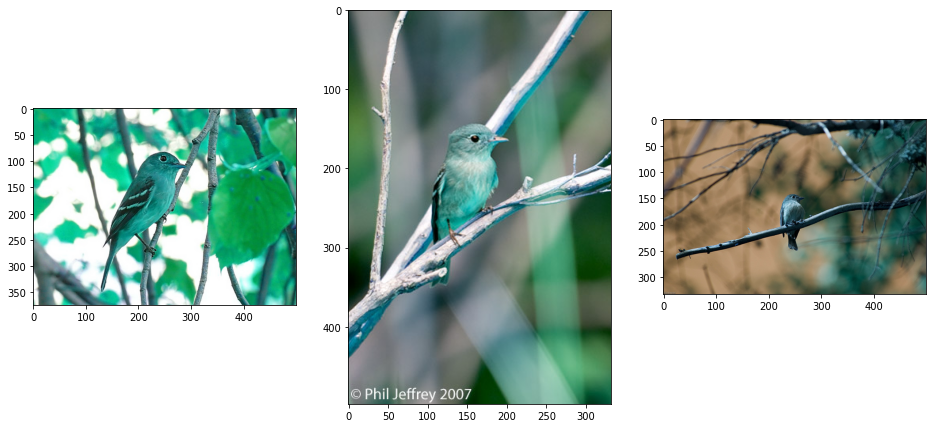

In [ ]:
BirdView('043.Yellow_bellied_Flycatcher')

In [ ]:
print(os.listdir('/content/bird/images'))

['._011.Rusty_Blackbird', '._052.Pied_billed_Grebe', '014.Indigo_Bunting', '105.Whip_poor_Will', '._001.Black_footed_Albatross', '._056.Pine_Grosbeak', '._188.Pileated_Woodpecker', '088.Western_Meadowlark', '._143.Caspian_Tern', '160.Black_throated_Blue_Warbler', '123.Henslow_Sparrow', '030.Fish_Crow', '175.Pine_Warbler', '089.Hooded_Merganser', '091.Mockingbird', '164.Cerulean_Warbler', '037.Acadian_Flycatcher', '._105.Whip_poor_Will', '._186.Cedar_Waxwing', '083.White_breasted_Kingfisher', '._103.Sayornis', '._165.Chestnut_sided_Warbler', '117.Clay_colored_Sparrow', '._020.Yellow_breasted_Chat', '._087.Mallard', '176.Prairie_Warbler', '._061.Heermann_Gull', '._042.Vermilion_Flycatcher', '071.Long_tailed_Jaeger', '031.Black_billed_Cuckoo', '081.Pied_Kingfisher', '100.Brown_Pelican', '._114.Black_throated_Sparrow', '190.Red_cockaded_Woodpecker', '052.Pied_billed_Grebe', '._081.Pied_Kingfisher', '._040.Olive_sided_Flycatcher', '135.Bank_Swallow', '._077.Tropical_Kingbird', '026.Bronzed_

In [ ]:
import glob


def delete_files(path, pattern):
    for f in glob.iglob(os.path.join(path, pattern)):
        try:
            os.remove(f)
        except OSError as exc:
            print (exc)

In [ ]:
delete_files(data_path, '._**')

In [ ]:
f = open('/content/bird/lists/classes.txt', 'r')

for line in f:
    v,_ = line.split('.')
    k=line
    labels_dict[k.strip()] = int(v.strip())

f.close()

In [ ]:
labels_dict

{'001.Black_footed_Albatross': 1,
 '002.Laysan_Albatross': 2,
 '003.Sooty_Albatross': 3,
 '004.Groove_billed_Ani': 4,
 '005.Crested_Auklet': 5,
 '006.Least_Auklet': 6,
 '007.Parakeet_Auklet': 7,
 '008.Rhinoceros_Auklet': 8,
 '009.Brewer_Blackbird': 9,
 '010.Red_winged_Blackbird': 10,
 '011.Rusty_Blackbird': 11,
 '012.Yellow_headed_Blackbird': 12,
 '013.Bobolink': 13,
 '014.Indigo_Bunting': 14,
 '015.Lazuli_Bunting': 15,
 '016.Painted_Bunting': 16,
 '017.Cardinal': 17,
 '018.Spotted_Catbird': 18,
 '019.Gray_Catbird': 19,
 '020.Yellow_breasted_Chat': 20,
 '021.Eastern_Towhee': 21,
 '022.Chuck_will_Widow': 22,
 '023.Brandt_Cormorant': 23,
 '024.Red_faced_Cormorant': 24,
 '025.Pelagic_Cormorant': 25,
 '026.Bronzed_Cowbird': 26,
 '027.Shiny_Cowbird': 27,
 '028.Brown_Creeper': 28,
 '029.American_Crow': 29,
 '030.Fish_Crow': 30,
 '031.Black_billed_Cuckoo': 31,
 '032.Mangrove_Cuckoo': 32,
 '033.Yellow_billed_Cuckoo': 33,
 '034.Gray_crowned_Rosy_Finch': 34,
 '035.Purple_Finch': 35,
 '036.Northe

In [ ]:
def load_data():
  #Loads data and preprocesses it,returns train an test data along with labels
  images=[]
  labels=[]
  
  size=(64,64)
  print('Loaing Data from File ',end='')
  for folder in os.listdir(data_path):
    fol=folder.strip('._')
    path= data_path +  '/' + fol
    print(fol,end='|')
    for image in os.listdir(path):
      try:
         temp_img=cv2.imread(path+'/'+image)
         temp_img=cv2.resize(temp_img,size,interpolation=cv2.INTER_AREA)
         images.append(temp_img)
         labels.append(labels_dict[fol])
         temp_img=cv2.flip(temp_img,flipCode=1)
         images.append(temp_img)
         labels.append(labels_dict[fol])
         
     
      except Exception :
        pass
  images=np.array(images)
  images=images.astype('float32')/255.0
  labels=keras.utils.to_categorical(labels)
  X_train,X_test,y_train,y_test=train_test_split(images,labels,test_size=0.2)
  print()
  print('Loaded',len(X_train),' images for training','Train data shape ',X_train.shape)
  print('Loaded',len(X_test),' images for testing','Test data shape ',X_test.shape)

  return X_train,X_test,y_train,y_test

In [ ]:
X_train,X_test,y_train,y_test=load_data()

Loaing Data from File 014.Indigo_Bunting|105.Whip_poor_Will|088.Western_Meadowlark|160.Black_throated_Blue_Warbler|123.Henslow_Sparrow|030.Fish_Crow|175.Pine_Warbler|089.Hooded_Merganser|091.Mockingbird|164.Cerulean_Warbler|037.Acadian_Flycatcher|083.White_breasted_Kingfisher|117.Clay_colored_Sparrow|176.Prairie_Warbler|071.Long_tailed_Jaeger|031.Black_billed_Cuckoo|081.Pied_Kingfisher|100.Brown_Pelican|190.Red_cockaded_Woodpecker|052.Pied_billed_Grebe|135.Bank_Swallow|026.Bronzed_Cowbird|027.Shiny_Cowbird|185.Bohemian_Waxwing|061.Heermann_Gull|079.Belted_Kingfisher|197.Marsh_Wren|028.Brown_Creeper|009.Brewer_Blackbird|161.Blue_winged_Warbler|067.Anna_Hummingbird|140.Summer_Tanager|034.Gray_crowned_Rosy_Finch|054.Blue_Grosbeak|165.Chestnut_sided_Warbler|085.Horned_Lark|046.Gadwall|179.Tennessee_Warbler|080.Green_Kingfisher|182.Yellow_Warbler|154.Red_eyed_Vireo|178.Swainson_Warbler|045.Northern_Fulmar|049.Boat_tailed_Grackle|198.Rock_Wren|122.Harris_Sparrow|050.Eared_Grebe|131.Vesper_Sp

Size=64X64

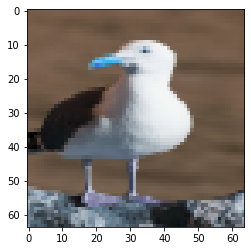

In [ ]:
plt.imshow(X_train[12,:,:])
plt.show()

Size=128X128

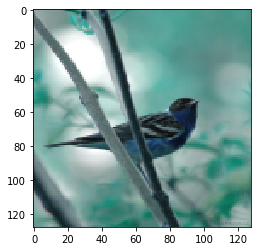

In [ ]:
plt.imshow(X_train[2101,:,:])
plt.show()

In [ ]:
def create_model():
    model=Sequential()
    model.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(Dense(201, activation = 'softmax'))
    model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
    
    print('Model Created')
    model.summary()
    return model

def fit_model():
  model_hist=model.fit(X_train,y_train,batch_size=64,epochs=25,validation_split=0.125)
  return model_hist

In [ ]:
z=y_train[:,0];np.max(z)

0.0

In [ ]:
z=y_train[:,200];np.max(z)

1.0

In [ ]:
z=y_train[:,201];np.max(z)

IndexError: ignored

In [ ]:
model=create_model()
curr_model_hist=fit_model()

Model Created
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 21, 21, 32)        9248      
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 7, 

In [ ]:
model.save_weights('83.55.h5')

In [ ]:
curr_model_hist=fit_model()

In [ ]:
model.save_weights('weights_88.32')
model.save('88.32')

In [ ]:
curr_model_hist=fit_model()

In [ ]:
curr_model_hist=fit_model()

In [ ]:
model.save_weights('weights_89.48.h5')
model.save('model_89.48.h5')

In [ ]:
curr_model_hist=fit_model()

Train on 16891 samples, validate on 2414 samples
Epoch 1/25
16891/16891 [==============================] - 10s 601us/step - loss: 0.6152 - acc: 0.9480 - val_loss: 1.0403 - val_acc: 0.8836
Epoch 2/25
16891/16891 [==============================] - 10s 593us/step - loss: 0.5991 - acc: 0.9528 - val_loss: 0.9600 - val_acc: 0.8964
Epoch 3/25
16891/16891 [==============================] - 10s 592us/step - loss: 0.6067 - acc: 0.9500 - val_loss: 0.9734 - val_acc: 0.8861
Epoch 4/25
16891/16891 [==============================] - 10s 596us/step - loss: 0.6096 - acc: 0.9516 - val_loss: 0.9726 - val_acc: 0.8956
Epoch 5/25
16891/16891 [==============================] - 10s 592us/step - loss: 0.5864 - acc: 0.9577 - val_loss: 0.9542 - val_acc: 0.8923
Epoch 6/25
16891/16891 [==============================] - 10s 597us/step - loss: 0.5902 - acc: 0.9529 - val_loss: 0.9565 - val_acc: 0.8956
Epoch 7/25
16891/16891 [==============================] - 10s 595us/step - loss: 0.5848 - acc: 0.9560 - val_loss: 1.0

In [ ]:
model.save("weights_8877.48.h5")

In [ ]:
evaluate_metrics=model.evaluate(X_test,y_test)
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluatation Loss = ","{:.6f}%".format(evaluate_metrics[0]))

4827/4827 [==============================] - 1s 308us/step

Evaluation Accuracy =  88.56% 
Evaluatation Loss =  1.040152%


In [ ]:
model.save(' best_model.h5')
model.save_weights(' best_weights')

In [ ]:
model.save_weights(' best_weights.h5')

In [ ]:
model.save_weights(' best_weights')

In [ ]:
model_yaml = model.to_yaml()
with open(" best_model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
print("Saved model to disk")

Saved model to disk
